In [1]:
import scipy.spatial
import pysal as ps
import numpy as np
from pointpattern import PointPattern
from window import as_window
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
points = [[66.22, 32.54], [22.52, 22.39], [31.01, 81.21], [9.47, 31.02],
               [30.78, 60.10], [75.21, 58.93], [79.26,  7.68], [8.23, 39.93],
               [98.73, 80.53], [89.78, 42.53], [65.19, 92.08], [54.46, 8.48]]
p1 = PointPattern(points)

In [3]:
p1

In [4]:
p1.window

In [5]:
p1.summary()

Point Pattern
12 points
Bounding rectangle [(8.23,7.68), (98.73,92.08)]
Area of window: 7638.2
Intensity estimate for window: 0.00157105077112


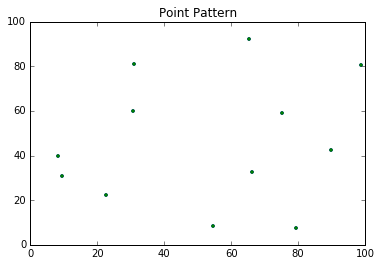

In [6]:
p1.plot()

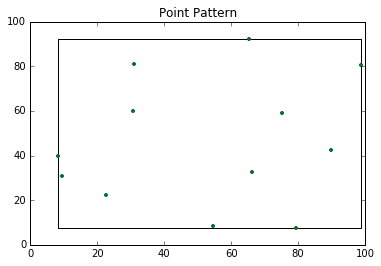

In [7]:
p1.plot(window=True)


In [11]:
from pysal.contrib import shapely_ext
va = ps.open(ps.examples.get_path("virginia.shp"))
polys = [shp for shp in va]
vapnts = ps.open(ps.examples.get_path("vapoints.shp"))
points = [shp for shp in vapnts]
state = shapely_ext.cascaded_union(polys)

In [12]:
vapp = PointPattern(points)

In [13]:
vapp.summary()

Point Pattern
400 points
Bounding rectangle [(-83.4026979929,36.5496591841), (-75.268296977,39.3733266666)]
Area of window: 22.9688436384
Intensity estimate for window: 17.4148949898


In [14]:
vapp1 = PointPattern(points, window = as_window(state))

In [15]:
vapp1.summary()

Point Pattern
400 points
Bounding rectangle [(-83.4026979929,36.5496591841), (-75.268296977,39.3733266666)]
Area of window: 10.5121358661
Intensity estimate for window: 38.0512585733


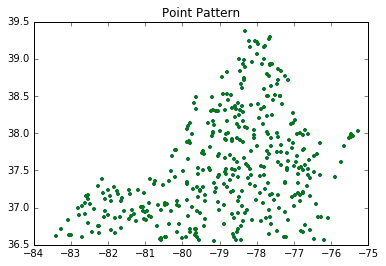

In [16]:
vapp1.plot()

In [ ]:
vapp1.plot()

In [ ]:
p1.knn()

In [ ]:
p1.csr(10)

In [ ]:
pp.G()

In [ ]:
pp.J()

In [ ]:
j = pp.J().T
plt.plot(j[:,0], j[:,1])

In [ ]:
g = pp.G()
plt.plot(g[:,0], g[:,1])

In [ ]:
f = pp.F()
plt.plot(f[:,0], f[:,1])

In [ ]:
pp.G(10)

In [ ]:
pp.G(25)

In [ ]:
p1.knn_other(p2, k=1)

In [ ]:
p2.knn_other(p1, k=1)

In [ ]:
p2.J()

In [ ]:
p1.find_pairs(20.0)

In [ ]:
import numpy as np
points = np.array(points)
plt.scatter(points[:,0], points[:,1])
#xlim([0,100])
#ylim([0,100])

In [ ]:
40 / 10.